# Load Packages

In [1]:
# scikit-learn, scikit-image are needed
# If those packages are missed, then, install them by using the following command
# pip install scikit-learn scikit-image

import os

import sklearn.datasets
import sklearn.linear_model
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics

import skimage.io
import skimage.transform
import skimage.color

import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

# Load Additional Packages (if you want to use other modules in Scikit Learn)

In [2]:
# Load additional scikit learn packages! if you need

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import VotingClassifier

# Load Data Points (Do not modify the following block)

In [10]:
image_size = 64
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

images = []
y = []
for i in labels:
    folderPath = os.path.join('./tumor_dataset/Training',i)
    for j in os.listdir(folderPath):
        img = skimage.io.imread(os.path.join(folderPath,j),)
        img = skimage.transform.resize(img,(image_size,image_size))
        img = skimage.color.rgb2gray(img)
        images.append(img)
        y.append(i)
        
images = np.array(images)

X = images.reshape((-1, image_size**2))
y = np.array(y)

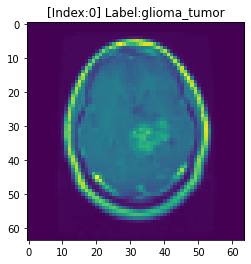

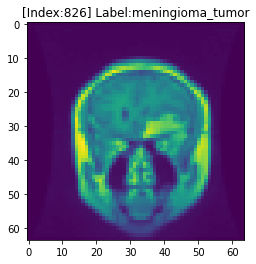

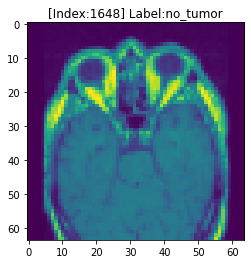

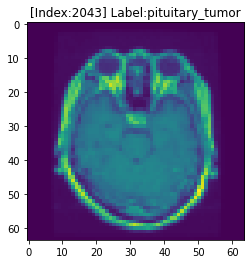

In [11]:
j = 0
for i in range(len(y)):
    if y[i] in labels[j]:
        plt.imshow(images[i])
        plt.title("[Index:{}] Label:{}".format(i, y[i]))
        plt.show()
        j += 1
    if j >= len(labels):
        break

In [12]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.028, random_state=0)

# Classification with Scikit Learn Library (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'X_train' is feature vectors of training dataset
- 'y_train' is target labels of training dataset
- 'X_test' is feature vectors of test dataset
- 'y_test' is target labels of test dataset
- 'y_pred' was initialized as zero vectors and fill 'y_pred' with predicted labels

### Find the best model and hyperparameter for face recognition

# ExtraTreesClassifier

In [13]:
et = ExtraTreesClassifier(n_estimators = 100,
                          max_depth = 30,
                          max_features = 1,
                          min_samples_split = 3,
                          n_jobs = -1,
                          random_state = 1774)

# KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors= 1)

# RidgeClassifier

In [15]:
rg = RidgeClassifier(alpha = 0.32)

# VotingClassifier

In [16]:
vote = VotingClassifier(estimators = [('et', et),
                                      ('knn', knn),
                                      ('rg', rg)])

vote.fit(X_train, y_train)
y_pred = vote.predict(X_test)

### Print accuracy (do not modify the following block)

In [17]:
print('Accuracy: %f' % sklearn.metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.925926
